In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

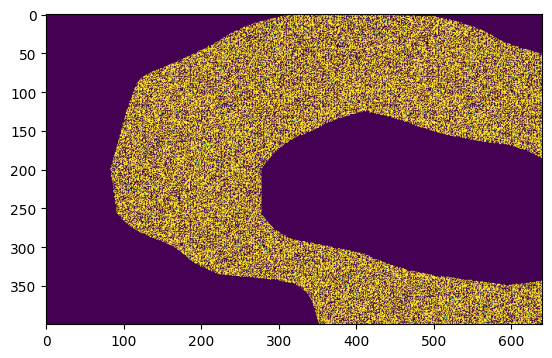

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [19]:
image = cv2.imread('train_screen.png', cv2.IMREAD_UNCHANGED)
H, W  = image.shape[:2]
ch = image[:,:,0]

## zoom in to center
ch = ch[H//4:H//4*2, W//4:W//4*2]

plt.imshow(ch)
plt.show()
print(np.unique(ch))

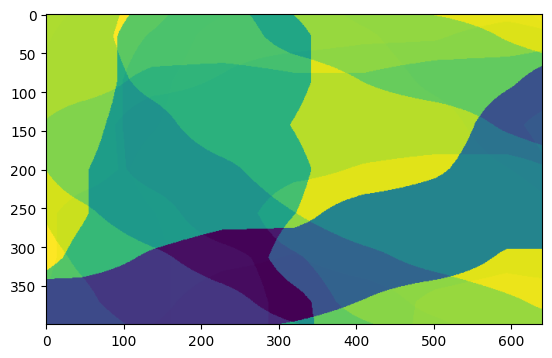

[  1   3   9  10  11  19  33  40  41  42  43  58  62  65  67  73  81  83
  97  99 105 113 115 129 130 131 134 138 139 142 147 150 151 158 161 162
 163 166 167 170 179 182 183 186 190 193 195 202 206 209 211 213 215 222
 223 225 227 234 238 241 243 245 247 250 254]


In [20]:
image = cv2.imread('val_screen.png', cv2.IMREAD_UNCHANGED)

ch = image[:,:,1]

## zoom in to center
ch = ch[H//4:H//4*2, W//4:W//4*2]

plt.imshow(ch)
plt.show()
print(np.unique(ch))

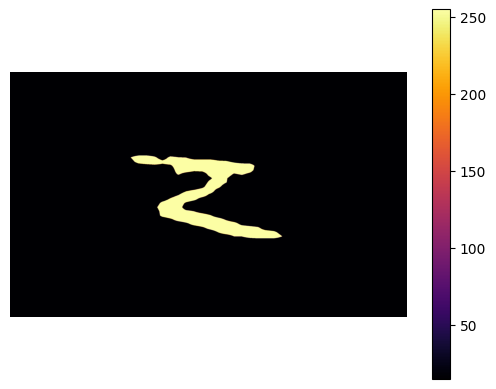

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('debug2.png', cv2.IMREAD_UNCHANGED)

digit = image[:,:,0] & 0xF0

# Crop a little bit
H, W = digit.shape
amount = 25
digit = digit[amount:H-amount, amount:W-amount]
digit = 255 - digit

plt.imshow(digit,cmap='inferno')
plt.colorbar()
plt.axis('off')
plt.show()


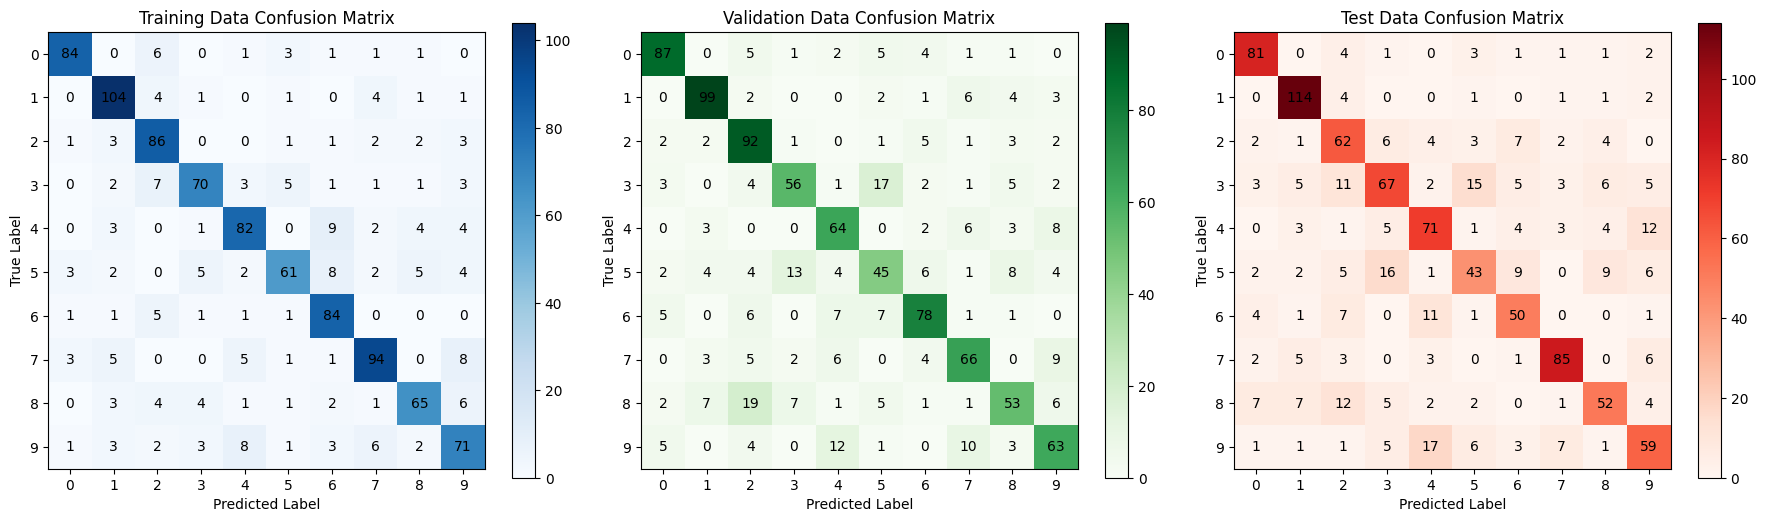

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

training_data = pd.read_csv('./2025_10_30/002/b/inference_train.csv')
test_data = pd.read_csv('./2025_10_30/002/b/inference_test.csv')
validation_data = pd.read_csv('./2025_10_30/002/b/inference_valid.csv')
target = training_data['Label'].values
pred   = training_data['Prediction'].values

# Plot confusion matrix for training data, validation data, and test data
confusion_matrix_train = np.zeros((10,10), dtype=int)
for t, p in zip(target, pred):
    confusion_matrix_train[t, p] += 1

# Compute confusion matrix for validation data
confusion_matrix_val = np.zeros((10,10), dtype=int)
target_val = validation_data['Label'].values
pred_val = validation_data['Prediction'].values
for t, p in zip(target_val, pred_val):
    confusion_matrix_val[t, p] += 1

# Compute confusion matrix for test data
confusion_matrix_test = np.zeros((10,10), dtype=int)
target_test = test_data['Label'].values
pred_test = test_data['Prediction'].values
for t, p in zip(target_test, pred_test):
    confusion_matrix_test[t, p] += 1

# Plot side-by-side
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.title('Training Data Confusion Matrix')
plt.imshow(confusion_matrix_train, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, confusion_matrix_train[i, j], ha='center', va='center', color='black')
plt.subplot(1, 3, 2)
plt.title('Validation Data Confusion Matrix')
plt.imshow(confusion_matrix_val, cmap='Greens')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, confusion_matrix_val[i, j], ha='center', va='center', color='black')
plt.subplot(1, 3, 3)
plt.title('Test Data Confusion Matrix')
plt.imshow(confusion_matrix_test, cmap='Reds')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()



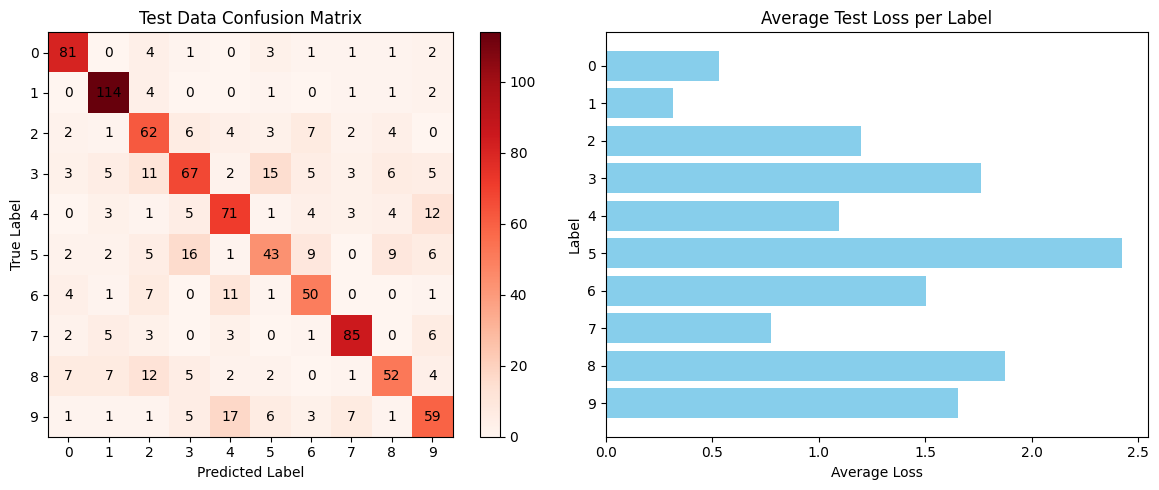

In [ ]:
# Plot only the test data confusion matrix
# Plot the average loss of test data per label

# Plot the average loss to the right of confusion matrix, where
# the bar graph is horizontal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Test Data Confusion Matrix')
plt.imshow(confusion_matrix_test, cmap='Reds')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='black')

# Make the bar graph smaller horizontally
test_losses = -test_data.groupby('Label')['Reward'].mean().values
plt.subplot(1, 2, 2)
plt.title('Mean Test Loss per Label')
plt.barh(np.arange(10), test_losses[::-1], color='skyblue')
plt.yticks(np.arange(10), labels=np.arange(9, -1, -1))
plt.xlabel('Mean Loss')
plt.ylabel('Label')
plt.tight_layout()
plt.show()
